CO

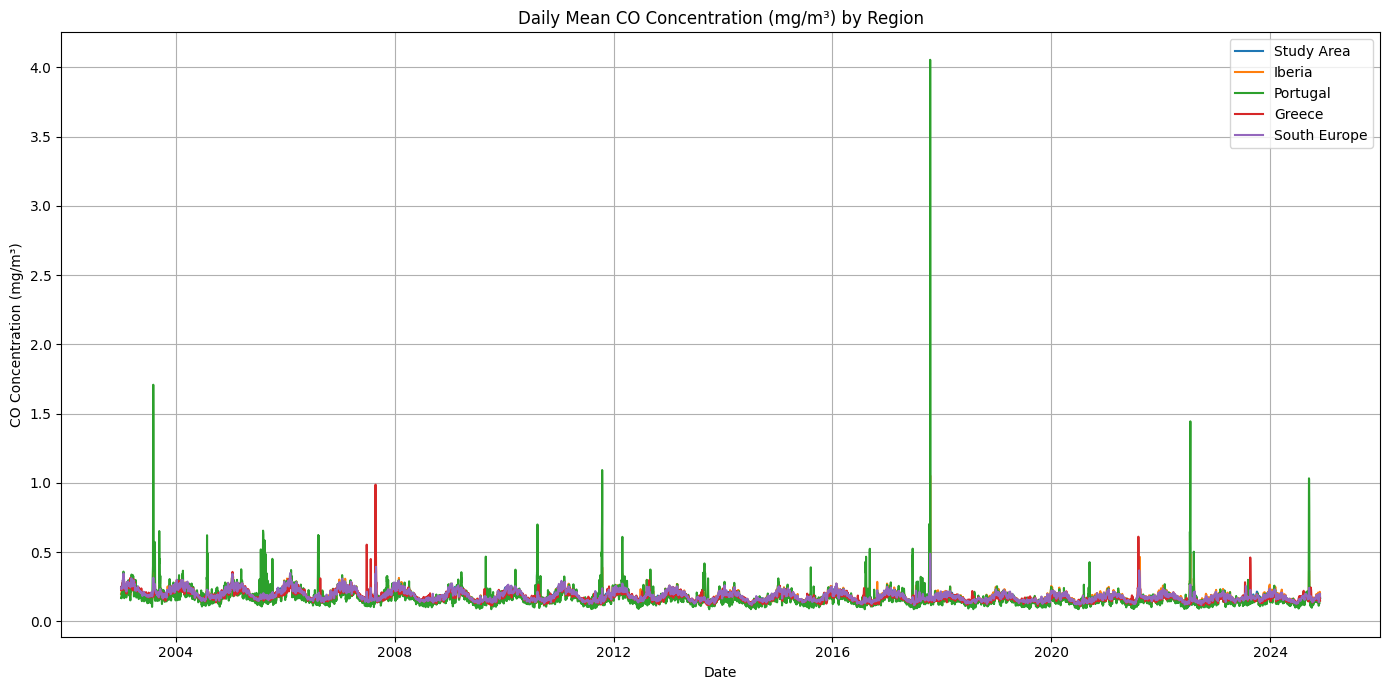

In [ ]:
#Time series study area, iberia, greece, portugal, south europe with daily averages

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the NetCDF file
file_path = r"E:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
ds = xr.open_dataset(file_path)

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Stack Year, Month, Day into a single dimension
co = ds['Mean'].stack(time=('Year', 'Month', 'Day'))

# Build datetime index from stacked coordinates
year = co['Year'].values
month = co['Month'].values
day = co['Day'].values

# Create datetime objects, filter out invalid ones
dates = []
valid_indices = []

for i in range(len(year)):
    try:
        dt = pd.Timestamp(year=int(year[i]), month=int(month[i]), day=int(day[i]))
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        # Skip invalid dates
        continue

# Select only valid entries
co = co.isel(time=valid_indices)

# Dictionary to store time series for each region
region_series = {}

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    subset = co.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
    regional_mean = subset.mean(dim=['latitude', 'longitude'])
    region_series[name] = pd.Series(regional_mean.values, index=pd.DatetimeIndex(dates))

# Plotting
plt.figure(figsize=(14, 7))

for name, series in region_series.items():
    plt.plot(series.index, series, label=name)

plt.title('Daily Mean CO Concentration (mg/m³) by Region')
plt.xlabel('Date')
plt.ylabel('CO Concentration (mg/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_14068\2489762535.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',


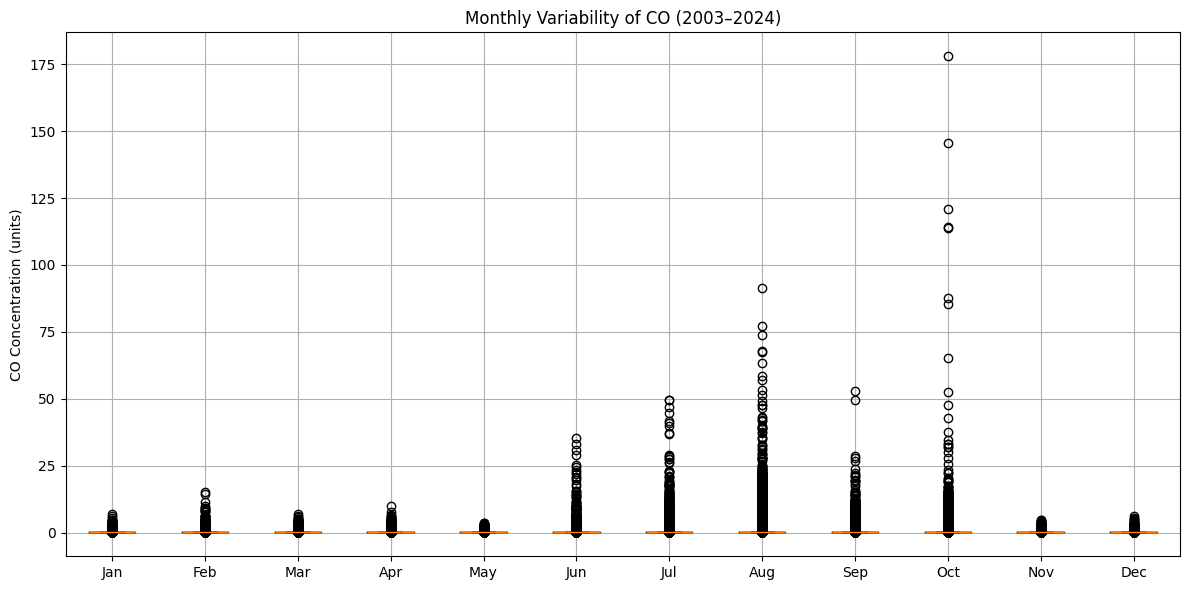

In [ ]:
#Boxplot variability by month every year

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Configuration ---
folder = r"E:\IPMA\CAMS\chem_multlvl\5compile_2003_2024"
var_name = 'co'  # variable you want to analyze

# --- Load and combine all yearly files ---
datasets = []
for file in sorted(os.listdir(folder)):
    if file.endswith('.nc'):
        ds = xr.open_dataset(os.path.join(folder, file))
        if var_name in ds:
            datasets.append(ds[[var_name]])  # only keep the variable of interest

# Concatenate along the time dimension
combined = xr.concat(datasets, dim='time')

# --- Prepare for boxplot ---
# Add month as a coordinate
combined = combined.assign_coords(month=combined['time.month'])

# Flatten spatial dimensions
var = combined[var_name].stack(z=('latitude', 'longitude'))

# Group by month
monthly_groups = var.groupby('month')

# Prepare data for boxplot
data_for_boxplot = []
for month, month_data in monthly_groups:
    flat = month_data.values.flatten()
    data_for_boxplot.append(flat[~pd.isna(flat)])

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.boxplot(data_for_boxplot, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title(f'Monthly Variability of {var_name.upper()} (2003–2024)')
plt.ylabel(f'{var_name.upper()} Concentration (units)')
plt.grid(True)
plt.tight_layout()
plt.show()

NOT IT

In [ ]:
#Boxplot variability by month for every year separated

In [ ]:
#excedencias tabela total - grafico barras mensal por areas de estudo

NO2

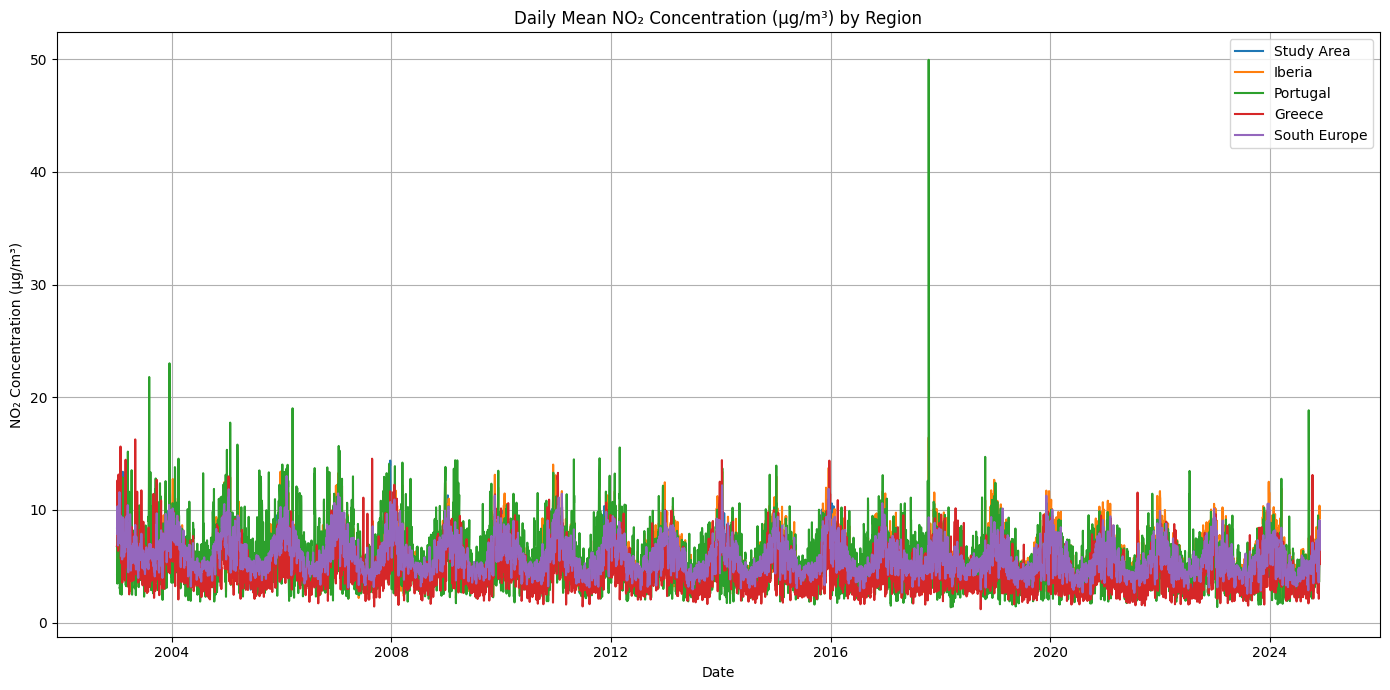

In [7]:
#Time series study area, iberia, greece, portugal, south europe with daily averages

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the NetCDF file for NO2
file_path = r"E:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc" 
ds = xr.open_dataset(file_path)

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Stack Year, Month, Day into a single dimension
no2 = ds['Mean'].stack(time=('Year', 'Month', 'Day'))

# Build datetime index from stacked coordinates
year = no2['Year'].values
month = no2['Month'].values
day = no2['Day'].values

# Create datetime objects, filter out invalid ones
dates = []
valid_indices = []

for i in range(len(year)):
    try:
        dt = pd.Timestamp(year=int(year[i]), month=int(month[i]), day=int(day[i]))
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Select only valid entries
no2 = no2.isel(time=valid_indices)

# Dictionary to store time series for each region
region_series = {}

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    subset = no2.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
    regional_mean = subset.mean(dim=['latitude', 'longitude'])
    region_series[name] = pd.Series(regional_mean.values, index=pd.DatetimeIndex(dates))

# Plotting
plt.figure(figsize=(14, 7))

for name, series in region_series.items():
    plt.plot(series.index, series, label=name)

plt.title('Daily Mean NO₂ Concentration (µg/m³) by Region')
plt.xlabel('Date')
plt.ylabel('NO₂ Concentration (µg/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

NO

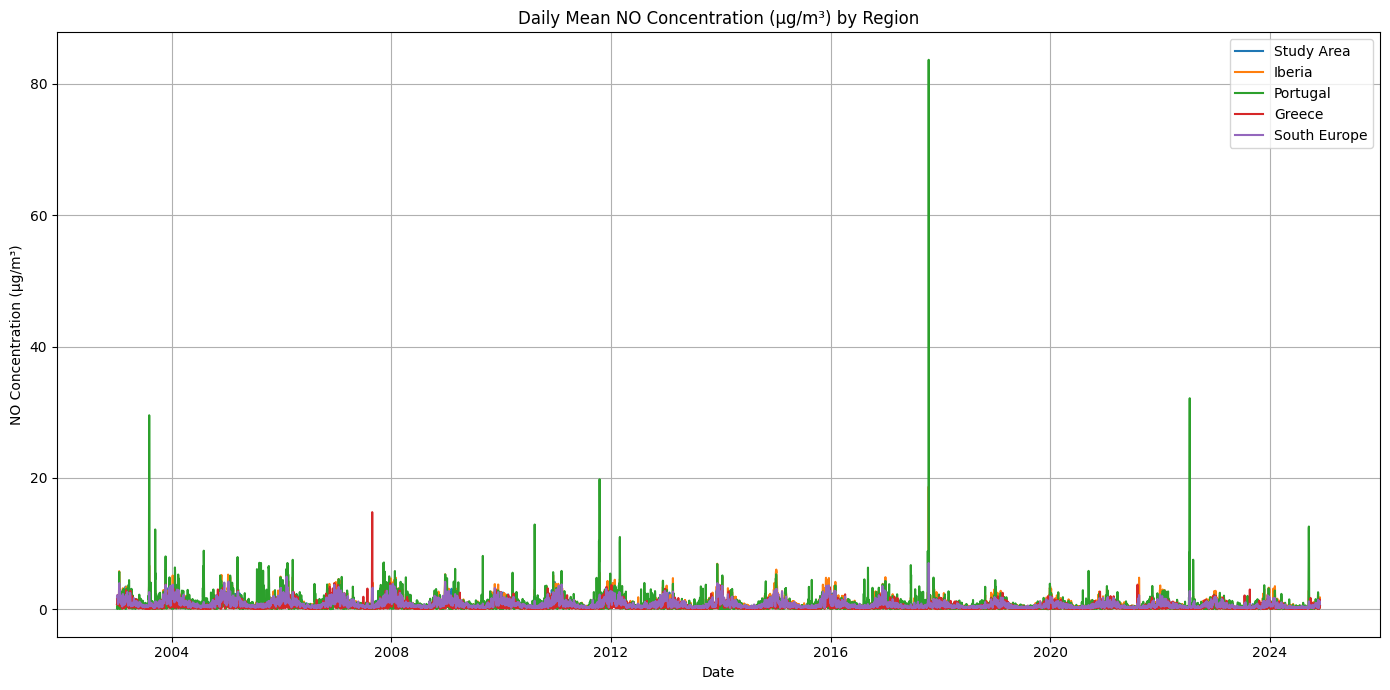

In [9]:
#Time series study area, iberia, greece, portugal, south europe with daily averages

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the NetCDF file for NO
file_path = r"E:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc" 
ds = xr.open_dataset(file_path)

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Stack Year, Month, Day into a single dimension
no = ds['Mean'].stack(time=('Year', 'Month', 'Day'))

# Build datetime index from stacked coordinates
year = no['Year'].values
month = no['Month'].values
day = no['Day'].values

# Create datetime objects, filter out invalid ones
dates = []
valid_indices = []

for i in range(len(year)):
    try:
        dt = pd.Timestamp(year=int(year[i]), month=int(month[i]), day=int(day[i]))
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Select only valid entries
no = no.isel(time=valid_indices)

# Dictionary to store time series for each region
region_series = {}

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    subset = no.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
    regional_mean = subset.mean(dim=['latitude', 'longitude'])
    region_series[name] = pd.Series(regional_mean.values, index=pd.DatetimeIndex(dates))

# Plotting
plt.figure(figsize=(14, 7))

for name, series in region_series.items():
    plt.plot(series.index, series, label=name)

plt.title('Daily Mean NO Concentration (µg/m³) by Region')
plt.xlabel('Date')
plt.ylabel('NO Concentration (µg/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


O3

In [ ]:
#Time series study area, iberia, greece, portugal, south europe with daily averages NEEDS TO BE REVISED BECAUSE OF THE WAY IT IS SHOWED IN WHO VALUES

import xarray as xr
import matplotlib.pyplot as plt
import os

# Set folder and file pattern
data_folder = r"E:\IPMA\CAMS\chem_multlvl\5compile_2003_2024"
file_pattern = os.path.join(data_folder, "CAMS_global_reanalysis_EAC4_chem_multlvl_20*.nc")

# Load all NetCDF files as one dataset
ds = xr.open_mfdataset(file_pattern, combine='by_coords')

# O3 variable
o3_data = ds['go3']

# Define your regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Create plot
plt.figure(figsize=(14, 6))

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    # Subset and spatial average
    o3_region = o3_data.sel(
        latitude=slice(lat_max, lat_min),  # descending latitude
        longitude=slice(lon_min, lon_max)
    ).mean(dim=["latitude", "longitude"])

    # Compute daily means from 3-hourly data
    o3_daily_mean = o3_region.resample(time="1D").mean(skipna=True)

    # Plot daily mean data
    plt.plot(o3_daily_mean['time'], o3_daily_mean, label=name, linewidth=0.8)

# Final plot formatting
plt.title("Daily Mean O3 Concentration Time Series (µg/m³) by European Region")
plt.xlabel("Time")
plt.ylabel("O3 Concentration (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


PM2.5

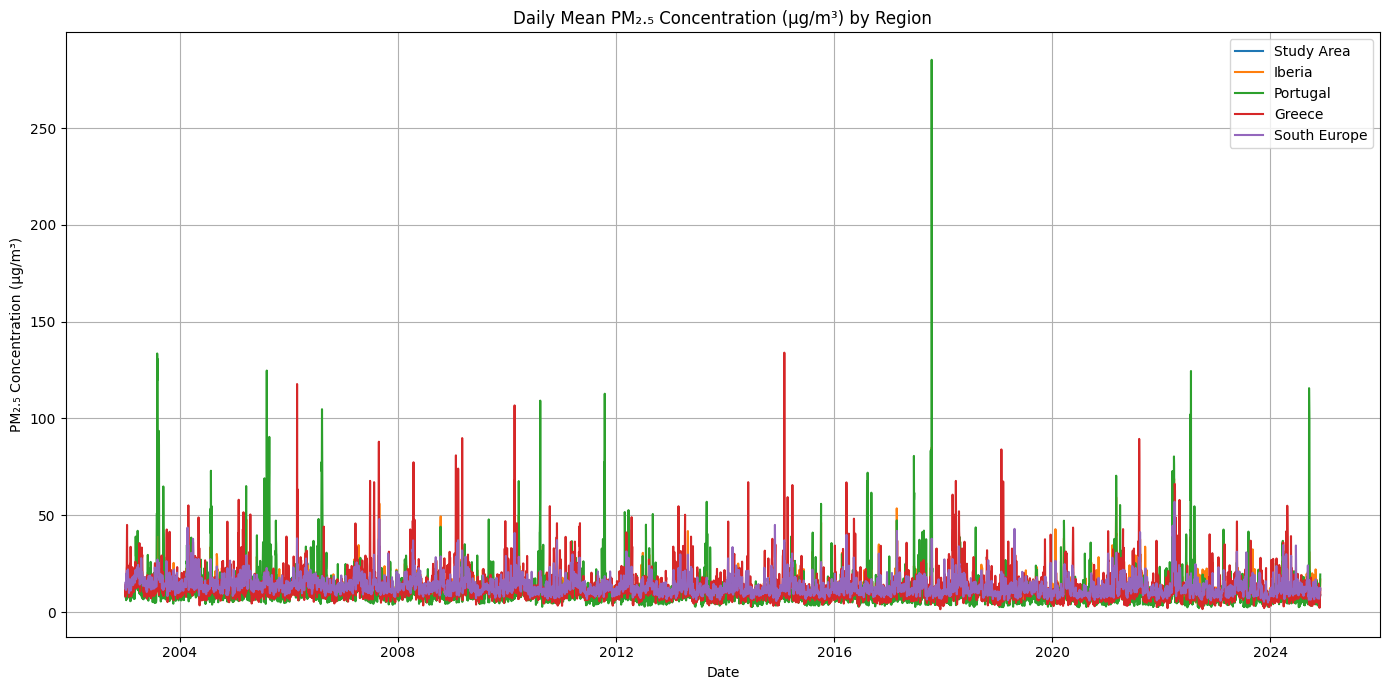

In [12]:
#Time series study area, iberia, greece, portugal, south europe with daily averages

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the NetCDF file for PM2.5
file_path = r"E:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
ds = xr.open_dataset(file_path)

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Stack Year, Month, Day into a single dimension
pm2p5 = ds['Mean'].stack(time=('Year', 'Month', 'Day'))

# Build datetime index from stacked coordinates
year = pm2p5['Year'].values
month = pm2p5['Month'].values
day = pm2p5['Day'].values

# Create datetime objects, filter out invalid ones
dates = []
valid_indices = []

for i in range(len(year)):
    try:
        dt = pd.Timestamp(year=int(year[i]), month=int(month[i]), day=int(day[i]))
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Select only valid entries
pm2p5 = pm2p5.isel(time=valid_indices)

# Dictionary to store time series for each region
region_series = {}

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    subset = pm2p5.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
    regional_mean = subset.mean(dim=['latitude', 'longitude'])
    region_series[name] = pd.Series(regional_mean.values, index=pd.DatetimeIndex(dates))

# Plotting
plt.figure(figsize=(14, 7))

for name, series in region_series.items():
    plt.plot(series.index, series, label=name)

plt.title('Daily Mean PM₂.₅ Concentration (µg/m³) by Region')
plt.xlabel('Date')
plt.ylabel('PM₂.₅ Concentration (µg/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


PM10

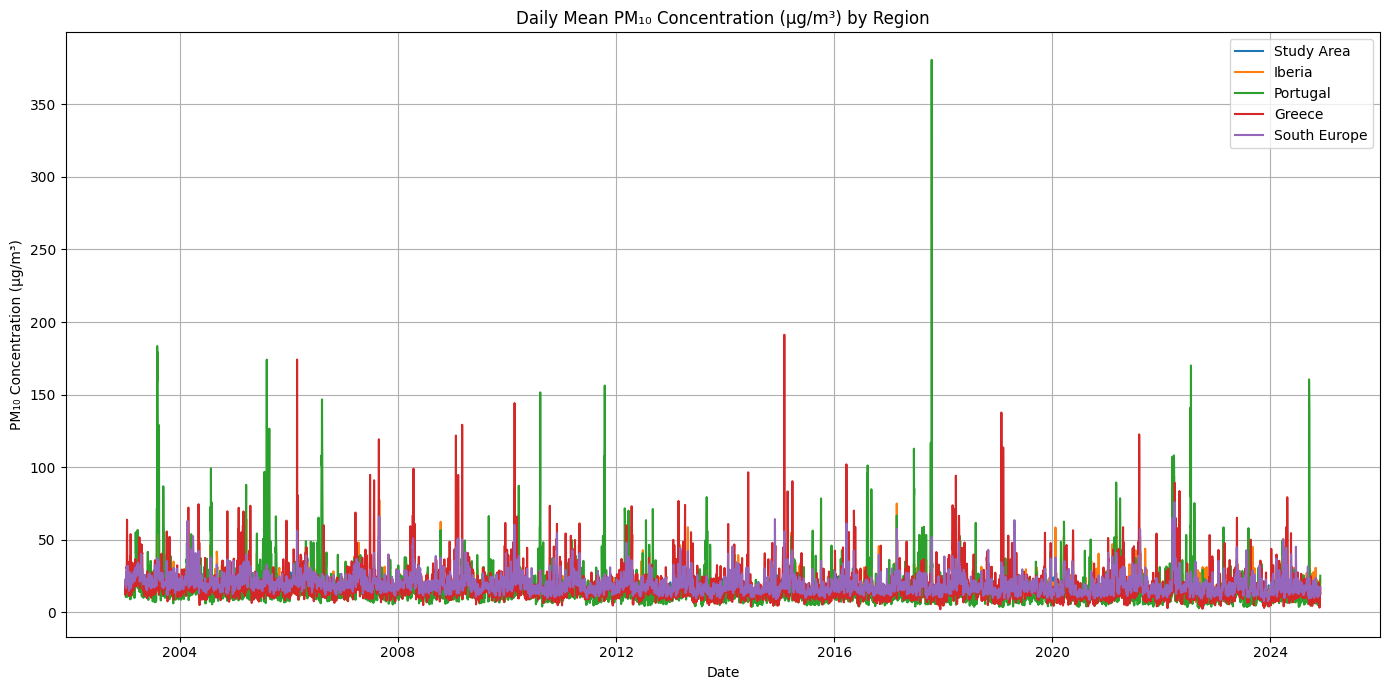

In [ ]:
#Time series study area, iberia, greece, portugal, south europe with daily averages

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the NetCDF file for PM10
file_path = r"E:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc"
ds = xr.open_dataset(file_path)

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Stack Year, Month, Day into a single dimension
pm10 = ds['Mean'].stack(time=('Year', 'Month', 'Day'))

# Build datetime index from stacked coordinates
year = pm10['Year'].values
month = pm10['Month'].values
day = pm10['Day'].values

# Create datetime objects, filter out invalid ones
dates = []
valid_indices = []

for i in range(len(year)):
    try:
        dt = pd.Timestamp(year=int(year[i]), month=int(month[i]), day=int(day[i]))
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Select only valid entries
pm10 = pm10.isel(time=valid_indices)

# Dictionary to store time series for each region
region_series = {}

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    subset = pm10.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
    regional_mean = subset.mean(dim=['latitude', 'longitude'])
    region_series[name] = pd.Series(regional_mean.values, index=pd.DatetimeIndex(dates))

# Plotting
plt.figure(figsize=(14, 7))

for name, series in region_series.items():
    plt.plot(series.index, series, label=name)

plt.title('Daily Mean PM₁₀ Concentration (µg/m³) by Region')
plt.xlabel('Date')
plt.ylabel('PM₁₀ Concentration (µg/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
